In [19]:
from importlib import reload
from os.path import join
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import songpipe
reload(songpipe)

<module 'songpipe' from '/mnt/c/Users/rntr/Repositories/songpipe/songpipe.py'>

In [44]:
# Calibration procedure:
# - Master bias (high and low)
# - Master darks (high and low)
# - Subtract bias/dark, apply gain, and merge high+low
# - Save frames and pass on to pyReduce

In [20]:
glob(join(rawdir, '*fits'))

['/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T14-40-28.fits',
 '/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T14-40-41.fits',
 '/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T14-40-53.fits',
 '/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T14-41-06.fits',
 '/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T14-41-18.fits',
 '/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T14-41-31.fits',
 '/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T14-41-44.fits',
 '/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T14-41-58.fits',
 '/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T14-42-11.fits',
 '/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T14-42-24.fits',
 '/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T14-42-59.fits',
 '/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T14-43-24.fits',
 '/mnt/c/data/SONG/ssmtkent/

In [21]:
datestr = '20220702'
basedir = '/mnt/c/data/SONG/ssmtkent/'
rawdir = join(basedir, 'star_spec', datestr, 'raw')
outdir = join(basedir, 'extr_spec', datestr)
images = songpipe.ImageList.from_filemask(join(rawdir, '*fits'), image_class=songpipe.HighLowImage)
images.list()

100%|█████████████████████████████████████████████████████████████████████████████████| 249/249 [00:02<00:00, 95.32it/s]

Filename                     Type    Exp    Object     
s3_2022-07-02T14-40-28.fits  DARK    10.0   DARK       
s3_2022-07-02T14-40-41.fits  DARK    10.0   DARK       
s3_2022-07-02T14-40-53.fits  DARK    10.0   DARK       
s3_2022-07-02T14-41-06.fits  DARK    10.0   DARK       
s3_2022-07-02T14-41-18.fits  DARK    10.0   DARK       
s3_2022-07-02T14-41-31.fits  DARK    10.0   DARK       
s3_2022-07-02T14-41-44.fits  DARK    10.0   DARK       
s3_2022-07-02T14-41-58.fits  DARK    10.0   DARK       
s3_2022-07-02T14-42-11.fits  DARK    10.0   DARK       
s3_2022-07-02T14-42-24.fits  DARK    10.0   DARK       
s3_2022-07-02T14-42-59.fits  DARK    20.0   DARK       
s3_2022-07-02T14-43-24.fits  DARK    20.0   DARK       
s3_2022-07-02T14-43-46.fits  DARK    20.0   DARK       
s3_2022-07-02T14-44-11.fits  DARK    20.0   DARK       
s3_2022-07-02T14-44-33.fits  DARK    20.0   DARK       
s3_2022-07-02T14-44-56.fits  DARK    20.0   DARK       
s3_2022-07-02T14-45-19.fits  DARK    20.0   DARK

In [30]:
# Assemble master bias
bias_list = images.filter(image_type='BIAS')
bias_list.list()
master_bias = bias_list.combine(method='median')

Filename                     Type  Exp  Object
s3_2022-07-02T16-54-01.fits  BIAS  0.0  BIAS
s3_2022-07-02T16-54-06.fits  BIAS  0.0  BIAS
s3_2022-07-02T16-54-08.fits  BIAS  0.0  BIAS
s3_2022-07-02T16-54-11.fits  BIAS  0.0  BIAS
s3_2022-07-02T16-54-15.fits  BIAS  0.0  BIAS
s3_2022-07-02T16-54-18.fits  BIAS  0.0  BIAS
s3_2022-07-02T16-54-23.fits  BIAS  0.0  BIAS
s3_2022-07-02T16-54-26.fits  BIAS  0.0  BIAS
s3_2022-07-02T16-54-28.fits  BIAS  0.0  BIAS
s3_2022-07-02T16-54-31.fits  BIAS  0.0  BIAS
s3_2022-07-02T17-29-12.fits  BIAS  0.0  BIAS
s3_2022-07-02T17-29-15.fits  BIAS  0.0  BIAS
s3_2022-07-02T17-29-18.fits  BIAS  0.0  BIAS
s3_2022-07-02T17-29-21.fits  BIAS  0.0  BIAS
s3_2022-07-02T17-29-23.fits  BIAS  0.0  BIAS
s3_2022-07-02T17-29-25.fits  BIAS  0.0  BIAS
s3_2022-07-02T17-29-28.fits  BIAS  0.0  BIAS
s3_2022-07-02T17-29-32.fits  BIAS  0.0  BIAS
s3_2022-07-02T17-29-34.fits  BIAS  0.0  BIAS
s3_2022-07-02T17-29-38.fits  BIAS  0.0  BIAS
s3_2022-07-02T17-29-41.fits  BIAS  0.0  BIAS
s3_2022-

 63%|███████████████████████████████████████████████████▌                              | 22/35 [00:00<00:00, 211.60it/s]

Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T16-54-18.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T16-54-23.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T16-54-26.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T16-54-28.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T16-54-31.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T17-29-12.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T17-29-15.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T17-29-18.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T17-29-21.fits" (ext 0)
Loading FI

100%|███████████████████████████████████████████████████████████████████████████████| 35/35 [00:00<00:00, 263555.91it/s]


Combine done!


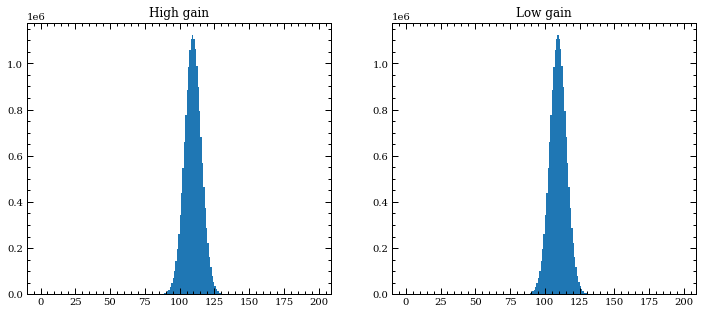

In [23]:
#master_bias.save_fits(join(outdir, 'calib/master_bias.fits'), overwrite=True)
master_bias.hist(bins=np.arange(0,200))

In [25]:
# Combine dark image
master_darks = {}  # Dict of darks for various exptimes
exptimes = images.get_exptimes()
# For each dark exptime, construct a master dark
for exptime in exptimes:
    dark_list = images.filter(image_type='DARK', exptime=exptime)
    if len(dark_list) == 0:
        print(f'No darks available for exptime {exptime} s')
        continue
    print(f'Building {exptime} s master dark')
    master_darks[exptime] = dark_list.combine(method='median')
    master_darks[exptime].subtract_bias(master_bias, inplace=True)  # Important!

No darks available for exptime 1.0 s
No darks available for exptime 2.5 s
No darks available for exptime 3.0 s
Combining 10.0 s master dark
Combining 10 images using method "median".


100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 100102.72it/s]


Combine done!
Combining 20.0 s master dark
Combining 10 images using method "median".


100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 75846.37it/s]


Combine done!
Combining 30.0 s master dark
Combining 10 images using method "median".


100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 62322.50it/s]


Combine done!
Combining 60.0 s master dark
Combining 10 images using method "median".


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 190.28it/s]

Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T14-53-13.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T14-54-16.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T14-55-19.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T14-56-24.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T14-57-27.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T14-58-31.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T14-59-34.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T15-00-38.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T15-01-41.fits" (ext 0)
Loading FI


100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 108660.73it/s]


Combine done!
Combining 90.0 s master dark
Combining 10 images using method "median".


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 133.50it/s]

Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T15-04-13.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T15-05-46.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T15-07-20.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T15-08-54.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T15-10-28.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T15-12-03.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T15-13-37.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T15-15-11.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T15-16-44.fits" (ext 0)
Loading FI


100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 111254.75it/s]


Combine done!
Combining 120.0 s master dark
Combining 10 images using method "median".


100%|███████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 91.72it/s]

Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T15-20-16.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T15-22-21.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T15-24-26.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T15-26-30.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T15-28-34.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T15-30-38.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T15-32-42.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T15-34-46.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T15-36-50.fits" (ext 0)
Loading FI


100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 83551.87it/s]


Combine done!
Combining 180.0 s master dark
Combining 10 images using method "median".


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 167.02it/s]

Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T15-41-22.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T15-44-27.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T15-47-31.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T15-50-35.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T15-53-40.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T15-56-44.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T15-59-48.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T16-02-52.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T16-05-57.fits" (ext 0)
Loading FI


100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 103819.41it/s]


Combine done!
Combining 240.0 s master dark
Combining 12 images using method "median".


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 176.40it/s]

Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T16-12-29.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T16-16-35.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T16-20-39.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T16-24-43.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T16-28-47.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T16-32-51.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T16-36-56.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T16-41-00.fits" (ext 0)
Loading FITS data from "/mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T16-45-05.fits" (ext 0)
Loading FI


100%|███████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 102508.45it/s]


Combine done!


In [29]:
dark_exptimes = np.array([0] + list(master_darks.keys()))

# Loop over all images except bias and darks
loop_images = images.filter(exptime=240.0).images
loop_images = [im for im in loop_images if im.type not in ('BIAS', 'DARK')]
for im_orig in loop_images:
    print(f'File: {im_orig.filename}')
    print('Subtracting master bias...')
    im = im_orig.subtract_bias(master_bias)

    # Select master dark based on exptime
    k = np.argmin(np.abs(dark_exptimes - im.exptime))
    dark_exptime = dark_exptimes[k]
    if dark_exptime > 0:
        print(f'Subracting {dark_exptime}s master dark...')
        im = im.subtract_dark(master_darks[dark_exptimes[k]])
        
    # Apply gain
    print('Applying gain and merge high+low')
    im = im.apply_gain()
    merged = im.merge_high_low()
    
    # Orientation
    print('Orienting image')
    merged.orient(flip_updown=True, rotation=270)
    
    # Save image
    fn = merged.construct_filename(suffix='prep')
    merged.save_fits(join(outdir, 'prep', fn), overwrite=True)

    print('----')

File: /mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T17-15-41.fits
Subtracting master bias...
Subracting 240.0s master dark...
Applying gain and merge high+low
Orienting image
Saving to /mnt/c/data/SONG/ssmtkent/extr_spec/20220702/prep/s3_2022-07-02T17-15-41_THArfib12_prep.fits...
----
File: /mnt/c/data/SONG/ssmtkent/star_spec/20220702/raw/s3_2022-07-02T17-19-47.fits
Subtracting master bias...
Subracting 240.0s master dark...
Applying gain and merge high+low
Orienting image
Saving to /mnt/c/data/SONG/ssmtkent/extr_spec/20220702/prep/s3_2022-07-02T17-19-47_THArfib12_prep.fits...
----
